/tmp/ipykernel_398733/238383460.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_df['Date'] = pd.to_datetime(price_df['Date'])


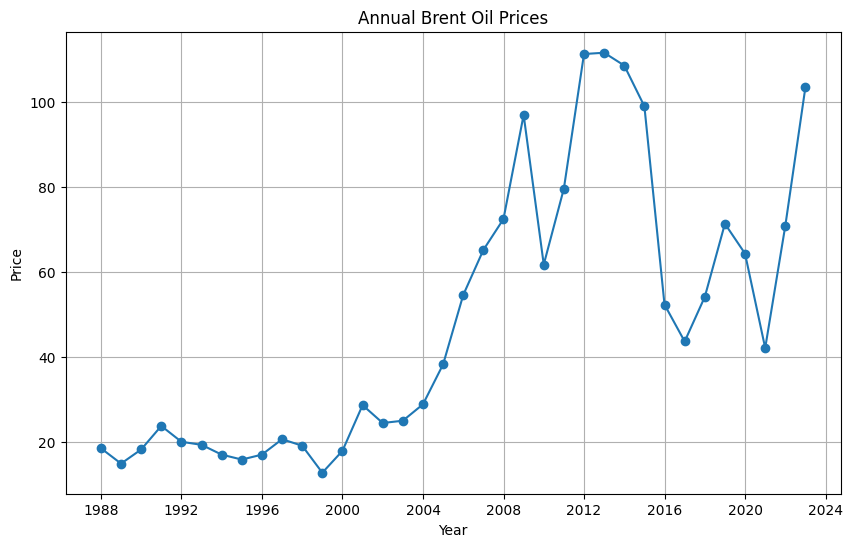

<Figure size 1000x600 with 0 Axes>

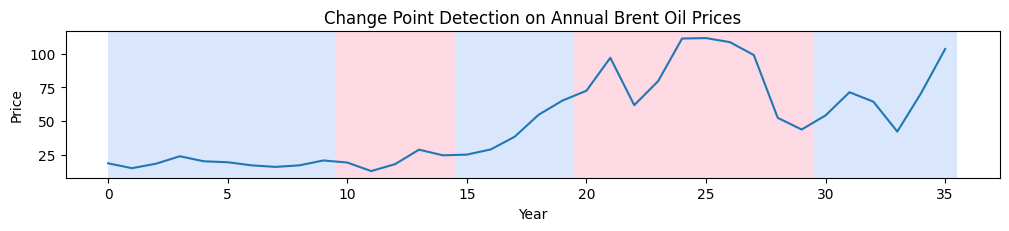

Detected change points: [10, 15, 20, 30] (note: these are indices of the detected points)


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Load Brent oil prices data
price_df = pd.read_csv("../Inputs/data/processed_data/cleaned_brent_prices_data.csv")

# Convert the 'Date' column to datetime object
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df = price_df.dropna(subset=['Date'])
price_df.set_index('Date', inplace=True)

# Resample the data to annual frequency, taking the mean price for each year
annual_price_df = price_df.resample('A').mean()

# Plot the annual Brent oil prices
plt.figure(figsize=(10, 6))
plt.plot(annual_price_df.index, annual_price_df['Price'], marker='o', linestyle='-')
plt.title('Annual Brent Oil Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Change point detection
signal = annual_price_df['Price'].values
model = "l2"  # model to apply: "l1", "l2", "rbf", etc.
algo = rpt.Pelt(model=model).fit(signal)
result = algo.predict(pen=10)

# Display results
plt.figure(figsize=(10, 6))
rpt.display(signal, result)
plt.title('Change Point Detection on Annual Brent Oil Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Print detected change points
print(f"Detected change points: {result[:-1]} (note: these are indices of the detected points)")


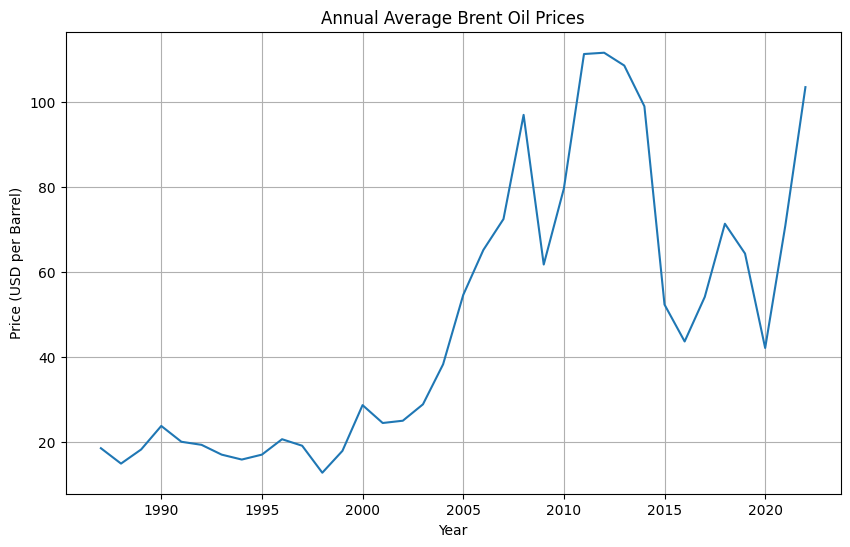

In [2]:
# Visualize the annual average Brent oil prices
plt.figure(figsize=(10, 6))
plt.plot(annual_price_df.index.year, annual_price_df['Price'])
plt.xlabel('Year')
plt.ylabel('Price (USD per Barrel)')
plt.title('Annual Average Brent Oil Prices')
plt.grid(True)
plt.show()


In [3]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# ARIMA model
arima_model = ARIMA(annual_price_df['Price'], order=(1, 1, 1)).fit()
print(arima_model.summary())

# GARCH model
garch_model = arch_model(annual_price_df['Price'], vol='Garch', p=1, q=1).fit()
print(garch_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -145.968
Date:                Sat, 06 Jul 2024   AIC                            297.937
Time:                        10:32:02   BIC                            302.603
Sample:                    12-31-1987   HQIC                           299.547
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4108      0.419     -0.980      0.327      -1.232       0.411
ma.L1          0.6490      0.388      1.674      0.094      -0.111       1.409
sigma2       244.7025     45.649      5.360      0.0

/tmp/ipykernel_398733/4062936901.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_df['Date'] = pd.to_datetime(price_df['Date'])
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


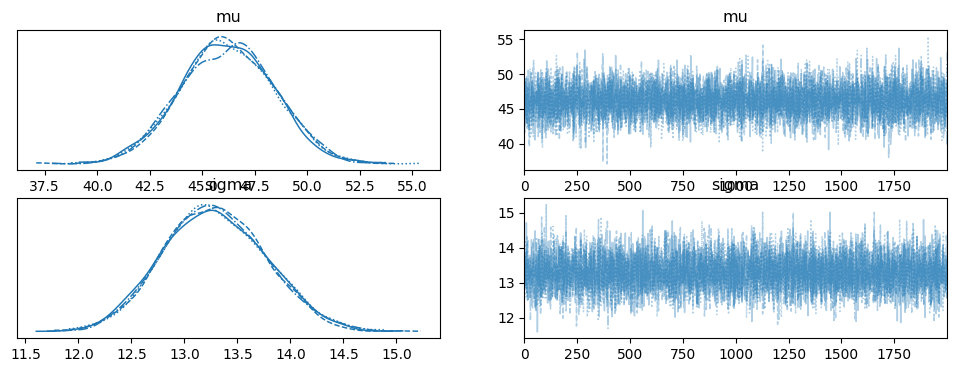

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     46.189  2.210  42.192   50.411      0.026    0.019    7144.0    5471.0   
sigma  13.288  0.483  12.405   14.195      0.006    0.004    7175.0    5520.0   

       r_hat  
mu       1.0  
sigma    1.0  


In [18]:
# import pymc3 as pm
# import arviz as az
# import pandas as pd

# # Bayesian model using PyMC3
# with pm.Model() as model:
#     mu = pm.Normal('mu', mu=0, sigma=10)
#     sigma = pm.HalfNormal('sigma', sigma=1)
#     likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=annual_price_df['Price'])
    
#     trace = pm.sample(2000, return_inferencedata=True)
    
# az.plot_trace(trace)
# plt.show()
# az.summary(trace)


import pymc3 as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

# Load Brent oil prices data
price_df = pd.read_csv("../Inputs/data/processed_data/cleaned_brent_prices_data.csv")

# Convert the 'Date' column to datetime object
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df = price_df.dropna(subset=['Date'])
price_df.set_index('Date', inplace=True)

# Resample the data to annual frequency, taking the mean price for each year
annual_price_df = price_df.resample('A').mean()

# Bayesian model using PyMC
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=annual_price_df['Price'])
    
    trace = pm.sample(2000, return_inferencedata=True, tune=1000)  # Increase tuning steps if necessary
    
# Plotting the trace
az.plot_trace(trace)
plt.show()

# Summarizing the trace
summary = az.summary(trace)
print(summary)


/tmp/ipykernel_398733/713825612.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_df['Date'] = pd.to_datetime(price_df['Date'])


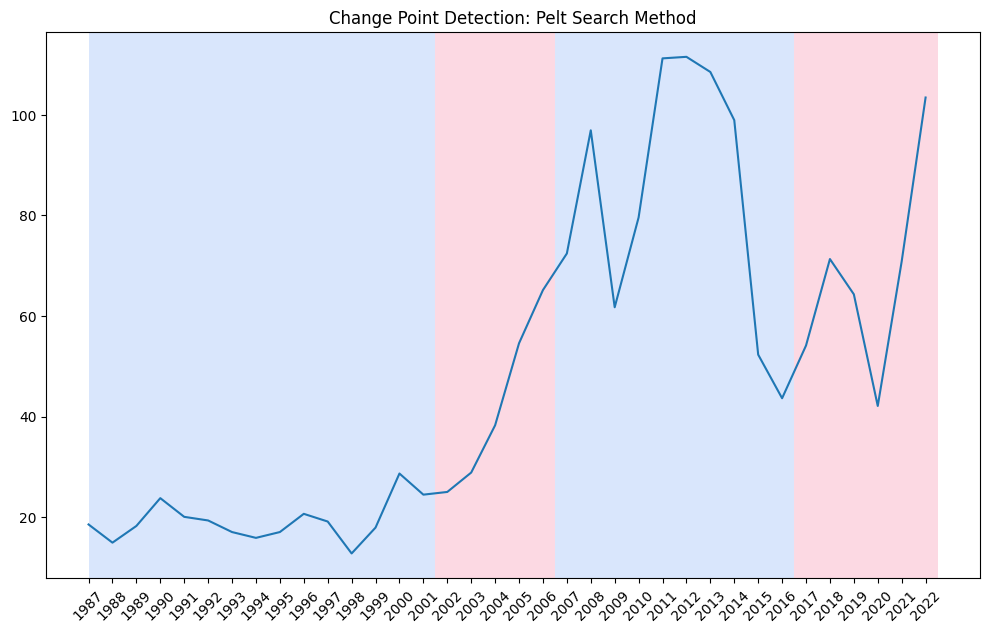

Turning points (Pelt): [2002, 2007, 2017]


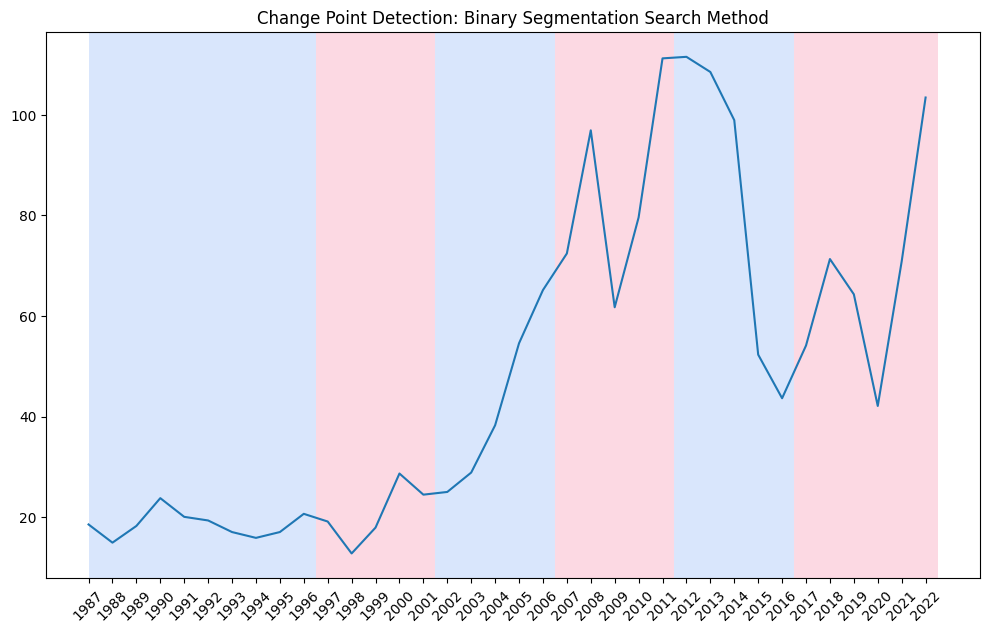

Turning points (Binary Segmentation): [1997, 2002, 2007, 2012, 2017]


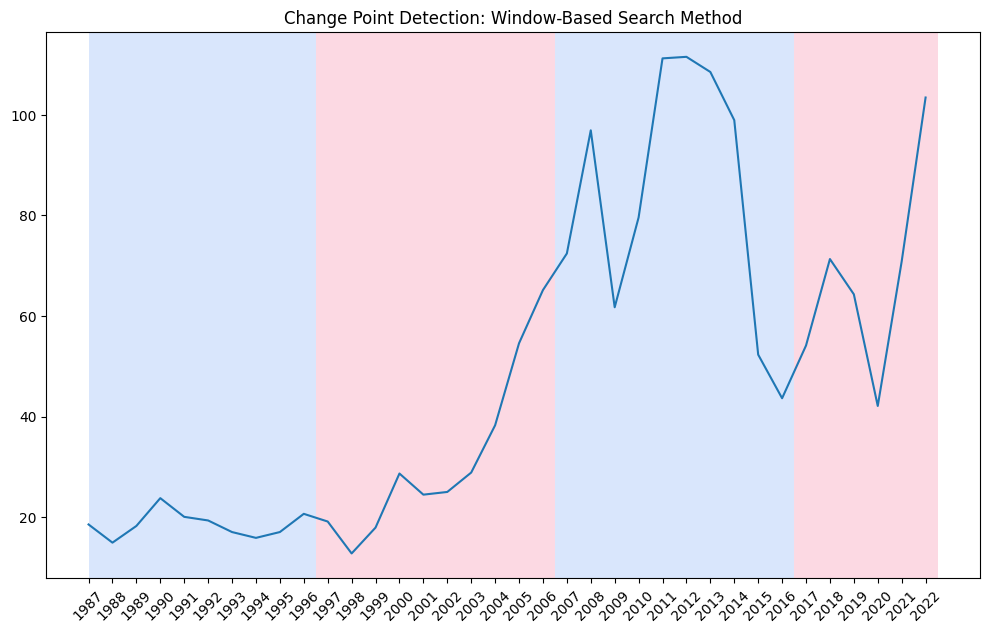

Turning points (Window-Based): [1997, 2007, 2017]


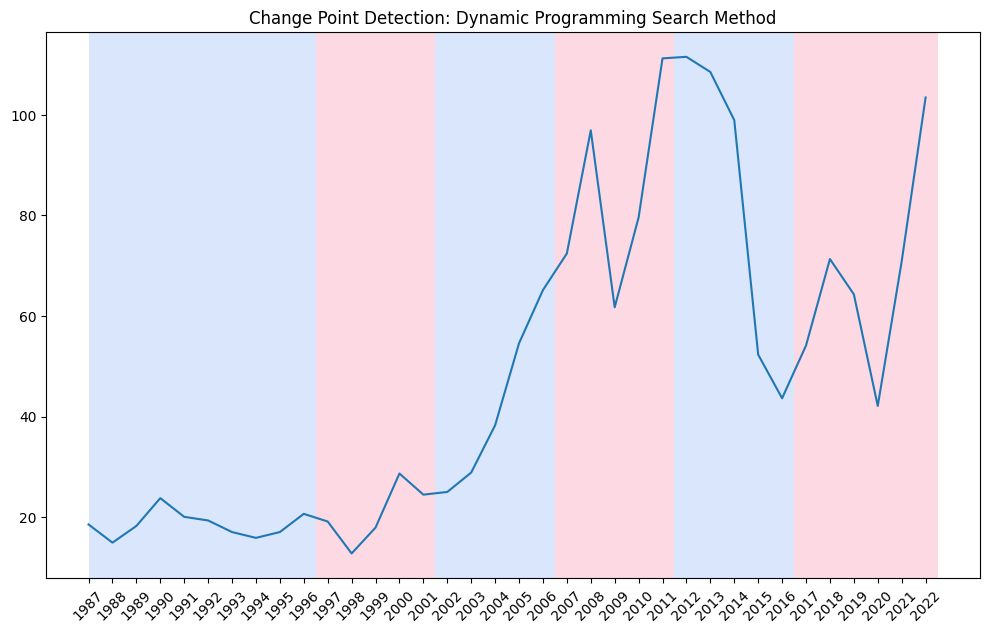

Turning points (Dynamic Programming): [1997, 2002, 2007, 2012, 2017]


In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Load and format the data
price_df = pd.read_csv("../Inputs/data/processed_data/cleaned_brent_prices_data.csv")

# Convert the 'Date' column to datetime object
price_df['Date'] = pd.to_datetime(price_df['Date'])

# Drop rows where the 'Date' conversion failed
price_df = price_df.dropna(subset=['Date'])

# Set 'Date' as the index
price_df.set_index('Date', inplace=True)

# Resample the data to annual frequency, taking the mean price for each year
annual_price_df = price_df.resample('A').mean()

# Convert the time series values to a numpy 1D array
points = annual_price_df['Price'].values
dates = annual_price_df.index.year  # Extract the years for x-axis labels

# Function to display results and extract turning point years
def display_and_extract_turning_points(points, model_cls, method_name, **kwargs):
    model = kwargs.pop('model', 'l2') 
    pen = kwargs.pop('pen', None) 
    n_bkps = kwargs.pop('n_bkps', 3)  
    algo = model_cls(model=model, **kwargs).fit(points)
    
    if pen is not None:
        result = algo.predict(pen=pen)
    else:
        result = algo.predict(n_bkps=n_bkps)
    
    turning_point_years = [dates[cp] for cp in result[:-1]]  # exclude the last breakpoint
    rpt.show.display(points, result, figsize=(10, 6))
    plt.xticks(ticks=np.arange(len(dates)), labels=dates, rotation=45)  # Set x-axis labels
    plt.title(f'Change Point Detection: {method_name}')
    plt.show()
    return turning_point_years

# RUPTURES PACKAGE

# Change point detection with the Pelt search method
turning_points_pelt = display_and_extract_turning_points(points, rpt.Pelt, 'Pelt Search Method', model="rbf", pen=0.5)
print(f'Turning points (Pelt): {turning_points_pelt}')

# Change point detection with the Binary Segmentation search method
turning_points_binseg = display_and_extract_turning_points(points, rpt.Binseg, 'Binary Segmentation Search Method', model="l2", n_bkps=5)
print(f'Turning points (Binary Segmentation): {turning_points_binseg}')

# Change point detection with the Window-based search method
turning_points_window = display_and_extract_turning_points(points, rpt.Window, 'Window-Based Search Method', model="l2", width=3, n_bkps=5)
print(f'Turning points (Window-Based): {turning_points_window}')

# Change point detection with the Dynamic Programming search method
turning_points_dynp = display_and_extract_turning_points(points, rpt.Dynp, 'Dynamic Programming Search Method', model="l1", min_size=1, n_bkps=5)
print(f'Turning points (Dynamic Programming): {turning_points_dynp}')

